# Phase 1: Exploratory data analysis and data pre-processing

### Taryn Chung (301239706), ZeYu Zhu (301341176), Kearro Chow (301279961)

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
color = sns.color_palette()

In [2]:
train_df = pd.read_json("train.json")
#train_df

## Visualization of target variable (interest level)

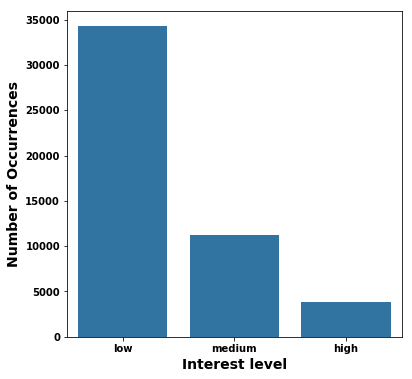

In [3]:
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(6,6))
sns.barplot(int_level.index, int_level.values, alpha=1, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=14, fontweight='bold')
plt.xlabel('Interest level', fontsize=14, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.show()

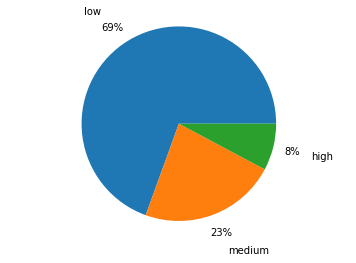

In [4]:
plt.pie(int_level.values,(0,0,0),int_level.index, autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
plt.axis('equal')
plt.show()

## Hour-wise listing trend

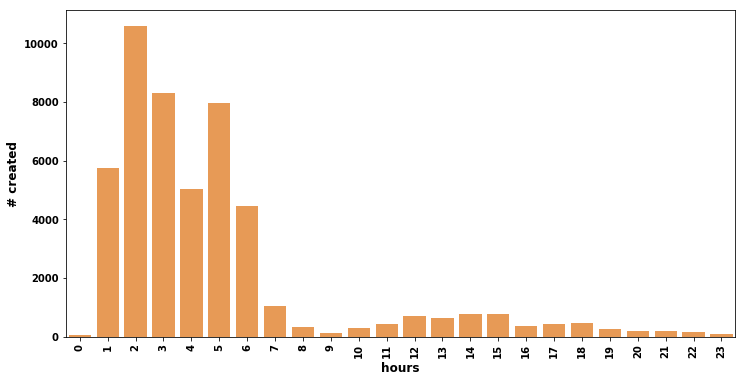

In [5]:
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["hour_created"] = train_df["created"].dt.hour
hour = train_df['hour_created'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(hour.index, hour.values, alpha=0.8, color=color[1])
plt.xlabel('hours', fontsize=12, fontweight='bold')
plt.ylabel('# created', fontsize=12, fontweight='bold')
plt.xticks(rotation='vertical', fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

In [6]:
top5 = hour[:5]
print("Busiest 5 Hours:\n",top5)

('Busiest 5 Hours:\n', 2    10596
3     8318
5     7954
1     5749
4     5021
Name: hour_created, dtype: int64)


## Visualizing features

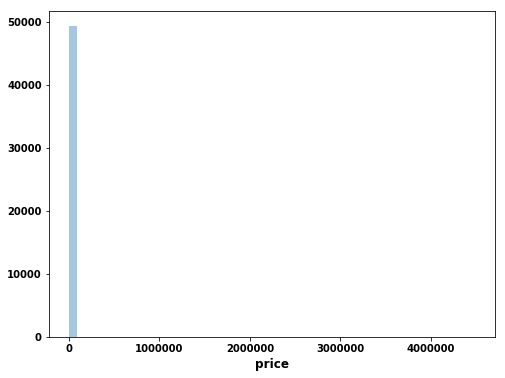

In [7]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values, bins=50, kde=False)
plt.xlabel('price', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

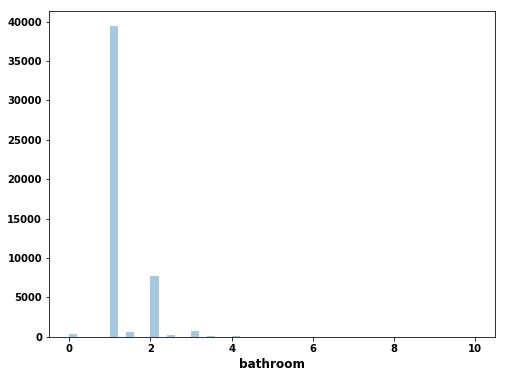

In [8]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.bathrooms.values, kde=False)
plt.xlabel('bathroom', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

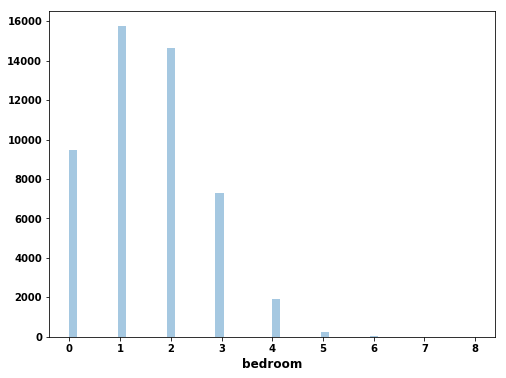

In [9]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.bedrooms.values, kde=False)
plt.xlabel('bedroom', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

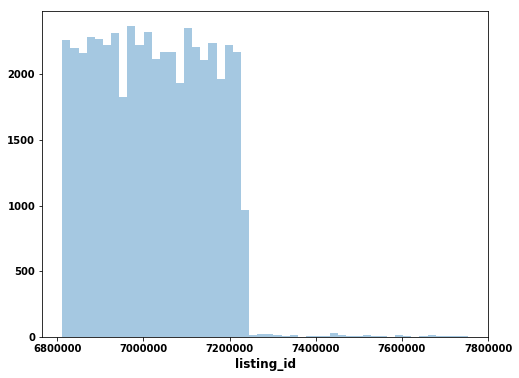

In [10]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.listing_id.values, kde=False)
plt.xlabel('listing_id', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

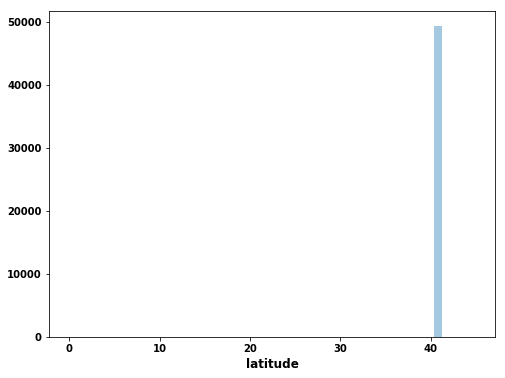

In [11]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.latitude.values,kde=False)
plt.xlabel('latitude', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

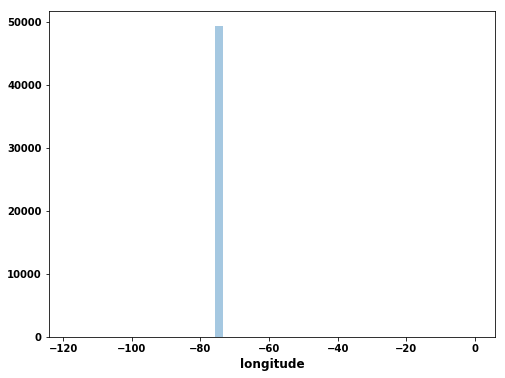

In [12]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.longitude.values, kde=False)
plt.xlabel('longitude', fontsize=12, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


## Handling missing values

In [13]:
# check if there are any null/nan values
train_df.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
interest_level     0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
hour_created       0
dtype: int64

### Bedrooms

In [14]:
# aggregate bedroom values by count
train_df.groupby('bedrooms').count();

In [15]:
# sum count of all bedroom values
train_df.groupby('bedrooms').count().sum()

bathrooms          49352
building_id        49352
created            49352
description        49352
display_address    49352
features           49352
interest_level     49352
latitude           49352
listing_id         49352
longitude          49352
manager_id         49352
photos             49352
price              49352
street_address     49352
hour_created       49352
dtype: int64

We found 9475 values with a bedroom count of 0. This is simply too high of a number to assume it is an error. Upon checking some photos, we realized that these are probably studio apartments so no bedrooms makes sense. When we aggregated the count of every value of bedrooms, we found there were no missing values.

### Bathrooms

In [16]:
# aggregate bathroom values by count
train_df.groupby('bathrooms').count();

In [17]:
# sum the count of all bathroom values
train_df.groupby('bathrooms').count().sum()

bedrooms           49352
building_id        49352
created            49352
description        49352
display_address    49352
features           49352
interest_level     49352
latitude           49352
listing_id         49352
longitude          49352
manager_id         49352
photos             49352
price              49352
street_address     49352
hour_created       49352
dtype: int64

Again, we found no missing values for bathrooms by the same technique as bedrooms. We found 313 places with with 0 bathrooms but this can be normal for places with a shared bathroom on a floor. 

### Building ID

In [18]:
whichrow = 0
count = 0
for row in train_df['building_id']:
    if row=='0' or any(c.isalpha() for c in row) == False:
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(30)

('number of missing values: ', 8286)


It's unlikely that building ID has any effect on the interest level of a listing since it is a random number that has no meaningful numerical value other than to identify the listing. We left these values since it is unlikely we will be training with this feature.

### Description

In [19]:
whichrow = 0
count = 0
for row in train_df['description']:
    if  any(c.isalpha() for c in row) == False:
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(50)

('number of missing values: ', 3336)


We left these values because having no description can also affect the interest level of a buyer.

### Features

In [20]:
whichrow = 0
count = 0
for row in train_df['features']:
    if row==[]:
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)
#train_df.head(50)

('number of missing values: ', 3218)


We left these values because having no features listed can also affect the interest level of a buyer.

### Created

In [21]:
import datetime

whichrow = 0
count = 0
for row in train_df['created']:
    if isinstance(row, datetime.datetime) == False:
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


### Display Address

In [22]:
whichrow = 0
count = 0
for row in train_df['display_address']:
    if any(c.isalpha() for c in row) == False:
        train_df.loc[train_df.index[whichrow], 'display_address'] = np.nan
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 141)


Since there are relatively few missing values and an address is important to have, we removed these values by changing them to NAN and dropping every row with a NAN.

### Street Address

In [23]:
whichrow = 0
count = 0
for row in train_df['street_address']:
    if any(c.isalpha() for c in row) == False :
        train_df.loc[train_df.index[whichrow], 'street_address'] = np.nan
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 13)


Since there are relatively few missing values and an address is important to have, we removed these values by changing them to NAN and dropping every row with a NAN.

### Latitude

In [24]:
whichrow = 0
count = 0
for row in train_df['latitude']:
    if row==0:
        train_df.loc[train_df.index[whichrow], 'latitude'] = np.nan
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 12)


Since there are relatively few missing values and an coordinates are important to have, we removed these values by changing them to NAN and dropping every row with a NAN.

### Listing ID

In [25]:
whichrow = 0
count = 0
for row in train_df['listing_id']:
    if row==0 or row==None:
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


### Longitude

In [26]:
whichrow = 0
count = 0
for row in train_df['longitude']:
    if row==0:
        train_df.loc[train_df.index[whichrow], 'longitude'] = np.nan
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 12)


Since there are relatively few missing values and an coordinates are important to have, we removed these values by changing them to NAN and dropping every row with a NAN.

### Manager ID

In [27]:
whichrow = 0
count = 0
for row in train_df['manager_id']:
    if  row==0 or row =='0' or any(c.isalpha() for c in row) == False:
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


### Photos

In [28]:
whichrow = 0
count = 0
for row in train_df['photos']:
    if  any(isinstance(c,str) for c in row) == False:
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 49352)


Since we won't be using this feature in later milestones, we left these missing values.

### Price

In [29]:
whichrow = 0
count = 0
for row in train_df['price']:
    if row==0:
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


In [30]:
#double check missing values
train_df.groupby('price').count().sum();

### Interest Level

In [31]:
whichrow = 0
count = 0
list= ["low", "medium", "high"]
for row in train_df['interest_level']:
    if row not in list :
        count+=1
        whichrow+=1
    else:
        whichrow += 1
print ("number of missing values: ", count)

('number of missing values: ', 0)


In [32]:
#remove selected rows with few missing values
train_df = train_df.dropna()

## Handling outliers

### Prices

In [33]:
q25, q75 = np.percentile(train_df['price'].values, 25), np.percentile(train_df['price'].values, 75)
iqr = q75-q25
cutoff = iqr * 3
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in train_df['price'].values if x > upper or x < lower]
print ("number of extreme outliers:", len(outliers))
#print(lower,upper)

('number of extreme outliers:', 1220)


In [34]:
q25, q75 = np.percentile(train_df['price'].values, 25), np.percentile(train_df['price'].values, 75)
iqr = q75-q25
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in train_df['price'].values if x > upper or x < lower]
print ("number of mild outliers:", len(outliers))
#print(lower,upper)

('number of mild outliers:', 2783)


#### Before Handling

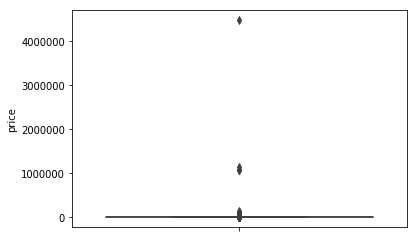

In [35]:
sns.boxplot(y=train_df['price'])

#### After Handling

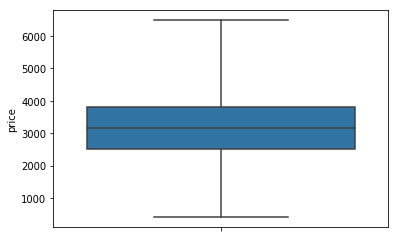

In [36]:
from scipy import nanmean
import math

whichrow = 0
for row in train_df['price']:
    if row>upper or row<lower:
        train_df.loc[train_df.index[whichrow], 'price'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
        
mean_val =round(nanmean(train_df['price']),2)

whichrow = 0
for row in train_df['price']:
    if math.isnan(row):
        train_df.loc[train_df.index[whichrow],'price'] = mean_val
        whichrow+=1
    else:
        whichrow+=1

sns.boxplot(y=train_df['price'], whis = [0,100])

We found the Tukey inner and outer fences to find the mild and extreme outliers. Extreme fences included a cutoff that left listings with a negative price range. We decided to only remove the mild outliers instead.  We replaced them with the mean value 3272.00 of so we have more data points to train with. The upper fence cutoff was 6,500 and the lower cutoff was 100. This dealt with outliers such as listings prices at 4,490,000, 43, and negative numbers, which are unrealistic. The new minimum price is 401 and the maximum is now 6,500.

### Latitude

#### Before Handling

In [37]:
q25, q75 = np.percentile(train_df['latitude'].values, 25), np.percentile(train_df['latitude'].values, 75)
iqr = q75-q25
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in train_df['latitude'].values if x > upper or x < lower]
print ("number of mild outliers:", len(outliers))
#print(lower, upper)

('number of mild outliers:', 1910)


In [38]:
q25, q75 = np.percentile(train_df['latitude'].values, 25), np.percentile(train_df['latitude'].values, 75)
iqr = q75-q25
cutoff = iqr * 3
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in train_df['latitude'].values if x > upper or x < lower]
print ("number of extreme outliers:", len(outliers))
#print(lower, upper)

('number of extreme outliers:', 135)


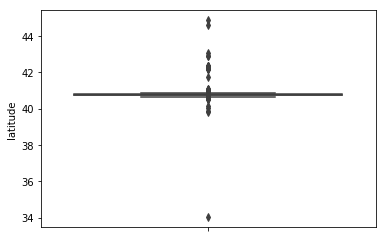

In [39]:
sns.boxplot(y=train_df['latitude'])

#### After Handling

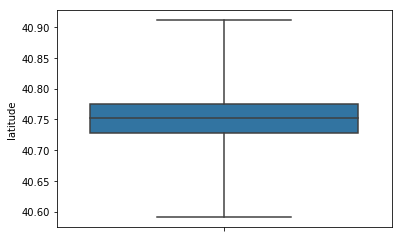

In [40]:
whichrow = 0
for row in train_df['latitude']:
    if row>upper or row<lower:
        train_df.loc[train_df.index[whichrow], 'latitude'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
        
mean_val = nanmean(train_df['latitude'])
#print(mean_val)
whichrow = 0
for row in train_df['latitude']:
    if math.isnan(row):
        train_df.loc[train_df.index[whichrow],'latitude'] = mean_val
        whichrow+=1
    else:
        whichrow+=1

sns.boxplot(y=train_df['latitude'], whis = [0,100])

We found the Tukey inner and outer fences to find the mild and extreme outliers. The inner fences still included listings that were within the NYC bounds, accoding to Google Maps. So we decided to only deal with the extreme outliers that were a little further out than NYC vicinity. We replaced with the mean value  of 40.7513098874893 so we have more data points to train with. The fence cutoffs we used were 40.5903 and 40.912299999999995. This dealt with outliers such as listings located in LA because we wanted to keep the listings within NYC. The new maximum and minimum longitude and latitude are now 40.9121 and 40.5904, respectively.

### Longitude

In [41]:
q25, q75 = np.percentile(train_df['longitude'].values, 25), np.percentile(train_df['longitude'].values, 75)
iqr = q75-q25
cutoff = iqr * 3
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in train_df['longitude'].values if x > upper or x < lower]
print ("number of extreme outliers:", len(outliers))
#print(lower, upper)

('number of extreme outliers:', 399)


In [42]:
q25, q75 = np.percentile(train_df['longitude'].values, 25), np.percentile(train_df['longitude'].values, 75)
iqr = q75-q25
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in train_df['longitude'].values if x > upper or x < lower]
print ("number of mild outliers:", len(outliers))
#print(lower, upper)

('number of mild outliers:', 1087)


#### Before Handling

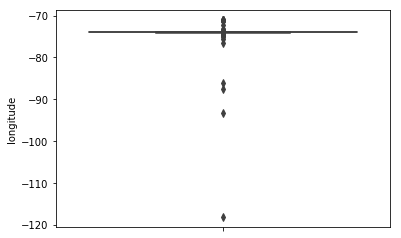

In [43]:
sns.boxplot(y=train_df['longitude'])

#### After Handling

-73.97499519850342


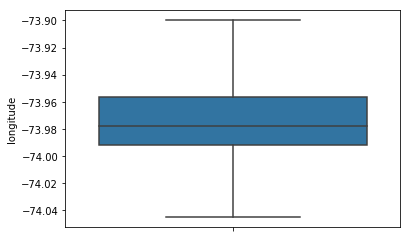

In [44]:
whichrow = 0
for row in train_df['longitude']:
    if row>upper or row<lower:
        train_df.loc[train_df.index[whichrow], 'longitude'] = np.nan
        whichrow+=1
    else:
        whichrow += 1
        
mean_val = nanmean(train_df['longitude'])
print(mean_val)

whichrow = 0
for row in train_df['longitude']:
    if math.isnan(row):
        train_df.loc[train_df.index[whichrow],'longitude'] = mean_val
        whichrow+=1
    else:
        whichrow+=1

sns.boxplot(y=train_df['longitude'] , whis = [0,100])

We found the Tukey inner and outer fences to find the mild and extreme outliers. The outer fences still included listings that were within the NYC borough bounds, accoding to Google Maps. The very bottom tip of New York the island is around -74.01 and -73.88 is in the Bronx. So we decided to only deal with the mild outliers that encompassed this. We replaced with the mean value  of 40.7513098874893 so we have more data points to train with. The fence cutoffs we used were -74.04704999999998 and -73.89945000000003. This dealt with outliers such as listings located in LA because we wanted to keep the listings within NYC. The new minimum and maximum longitude and latitude are now -74.0454 and -73.8995, respectively.

### Bedrooms

In [60]:
q25, q75 = np.percentile(train_df['bedrooms'].values, 25), np.percentile(train_df['bedrooms'].values, 75)
iqr = q75-q25
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in train_df['bedrooms'].values if x > upper or x < lower]
print ("number of mild outliers:", len(outliers))
print(lower, upper)

('number of mild outliers:', 2171)
(-0.5, 3.5)


In [61]:
q25, q75 = np.percentile(train_df['bedrooms'].values, 25), np.percentile(train_df['bedrooms'].values, 75)
iqr = q75-q25
cutoff = iqr * 3
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in train_df['bedrooms'].values if x > upper or x < lower]
print ("number of mild outliers:", len(outliers))
print(lower, upper)

('number of mild outliers:', 0)
(-2.0, 5.0)


#### Before Handling

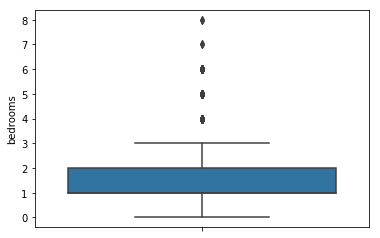

In [46]:
sns.boxplot(y=train_df['bedrooms'])

We found the Tukey inner and outer fences to find the mild and extreme outliers. There were 'outliers' but looking at the values, they seem to make sense, given the prices of our listings. It would make sense for a penthouse or large properties to have many bedrooms so a value like 8 isn't an error. We decided to leave this many values unchanged.

### Bathroom

In [58]:
q25, q75 = np.percentile(train_df['bathrooms'].values, 25), np.percentile(train_df['bathrooms'].values, 75)
iqr = q75-q25
cutoff = iqr * 1.5
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in train_df['bathrooms'].values if x > upper or x < lower]
print ("number of mild outliers:", len(outliers))
print(lower,upper)

('number of mild outliers:', 9911)
(1.0, 1.0)


In [59]:
q25, q75 = np.percentile(train_df['bathrooms'].values, 25), np.percentile(train_df['bathrooms'].values, 75)
iqr = q75-q25
cutoff = iqr * 3
lower, upper = q25 - cutoff, q75 + cutoff
outliers = [x for x in train_df['bathrooms'].values if x > upper or x < lower]
print ("number of mild outliers:", len(outliers))
print(lower,upper)

('number of mild outliers:', 9911)
(1.0, 1.0)


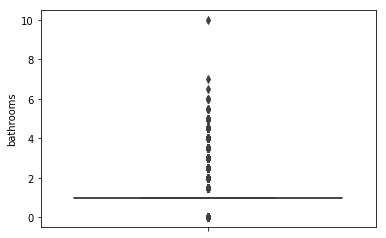

In [49]:
sns.boxplot(y=train_df['bathrooms'])

We found the Tukey inner and outer fences to find the mild and extreme outliers. A quarter of the data seem to be 'outliers' because the distriution is so largge, the upper and lower cutoffs were both 1. It doesn't make sense to remove a quarter of our data. Looking at the values, they seem to make sense, given the prices of our listings. It would make sense for a penthouse or large properties to have many bathrooms. We decided to leave this many values unchanged because this is unlikely due to noise.

<!-- ### Bathroom and Bedrooms

Outlier detection for bathrooms and bedrooms isn't meaningful because all values fall within a tidy distribution. All bathroom values lie between 0-4 and all bedroom values lie between 0-3, which makes sense for studio apartments and shared bathrooms. -->

### Created

Since no missing values were found, it doesn't seem meaningful to detect outliers since the only outlier values would be missing values or dates that don't exist (not one of 365 days in a year).

### Building ID, Manager ID, Listing ID

Again, not meaningful for outliers because there is no real meaning to these values, other than to identify the listing.

### Photos, Description, Features, Addresses

No discernable way to identify outliers until we are able to extract these features. Outliers would probably be photos of objects other than the listing, and text that doesn't relate, or an address outside of New York.

## Text feature extraction

Here we expore the text in two meaningful features of the listings: features and description. We use the TFIDF to tokenize the words found in each feature. Common stop words were excluded and we defined each word 2+ characters because there were some words found such as 'xx' and other random strings. Since the features are actually lists in this column, we concatenated them to string before tokenize. After tokenization, we vectorize each feature into new columns. 

In [50]:
#description
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', token_pattern=r'^[a-zA-Z][a-zA-Z]+')
vectorizer.fit(train_df['description'].values);
train_df['desc_vect'] = train_df['description'].apply(lambda x: vectorizer.transform([x]))
# vectorizer.vocabulary_  #shows all tokens

In [51]:
# convert features list to string
train_df['features'] = train_df['features'].apply(lambda x: ' '.join(x))

In [52]:
#features
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english', token_pattern=r'^[a-zA-Z][a-zA-Z]+')
vectorizer.fit(train_df['features'].values);
train_df['feat_vect'] = train_df['features'].apply(lambda x: vectorizer.transform([x]))
# vectorizer.vocabulary_  #shows all tokens

## Image feature extraction

We only exracted the sample images given because we won't be using this feature for training our models.

Used sklearn.feature_extraction.image.extract_patches_2d to reshape a 2D image into a collection of patches and store them in a data frame. Reconstruction from patches is demonstrated in the code.
Used matplotlib.pyplot.hist and OpenCV to analyze color of images using histogram. 1D arrays of images obtained from .ravel() are put into a data frame. Color histogram is produced using cv2.calcHist().
Used cv2.goodFeaturesToTrack to find 25 strongest corners in the images by Shi-Tomasi method. The corners are stored in a data frame. A demo is shown in the end.

### Get Image

In [53]:
import glob
import imageio

im2_list = []
shape_list = []
config = glob.glob("C:/Users/kylez/images_sample/**/*.jpg", recursive = True)
for filename in config:
    im2 = imageio.imread(str(filename))
    im2_list.append(im2)
    shape_list.append(im2.shape)
#print(im2_list[0])

ImportError: No module named imageio

### Show Image

In [ ]:
implot = plt.imshow(im2_list[0])
implot
plt.show()
#print(shape_list[0])
#print(im2_list[0].shape)

### Get Image Patches

In [ ]:
from sklearn.feature_extraction import image

l = len(im2_list)
patches_list = []
for i in range (0,l):
    patches = image.extract_patches_2d(im2_list[i], (2,2) )
    patches_list.append(patches)
print('Patches shape: {}'.format(patches_list[0].shape))
print(patches_list[0][0])
# print(patches_list[0])

### Reconstruct Image From Patches and Construct Tables

In [ ]:
length = len(im2_list)

temp = []
for i in range (1,length):
    temp += ["img"+str(i)]
    
tempdict = dict.fromkeys(temp, [])

for i in range(1,length+1):
    tempdict["img"+str(i)] = patches_list[int(i)-1]


# reconstruct from patches and show image 
tempf = im2_list[0]
tempimg =image.reconstruct_from_patches_2d(patches_list[0],(426, 640, 3))
np.testing.assert_array_equal(tempf,tempimg)

implot = plt.imshow(tempimg.astype(int))
plt.show()


# build table
a = zip(temp,patches_list)
img_pat = pd.DataFrame(a, columns = ['images','patches'])
img_pat.head(10)

### Extracting Colour Histogram

In [ ]:
test_img = im2_list[0]
plt.hist(test_img.ravel(),256,[0,256]);
plt.show()

In [ ]:

colorhist = []
for i in im2_list:
    colorhist.append(i.ravel())
# print(colorhist)

b = zip(temp,colorhist)
img_ravel = pd.DataFrame(b, columns = ['images','.ravel()'])
img_ravel.head(10)

In [ ]:
import cv2
  
color = ('r','g','b')
for i,col in enumerate(color):
    histr = cv2.calcHist([test_img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    plt.title("Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("Number of Pixels")
plt.show()

In [ ]:
for image in im2_list:
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([image],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        plt.title("Color Histogram")
        plt.xlabel("Bins")
        plt.ylabel("Number of Pixels")
plt.show()
# print(histr)

### Shi-Tomasi Corner Detector & Good Features to Track

In [ ]:

top25_corners = []

for image in im2_list:
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
    corners = np.int0(corners)
    top25_corners.append(corners)
    # print(corners)
    
# print(top25_corners)

c = zip(temp,top25_corners)


# table matching images to their corners
img_25corners = pd.DataFrame(c, columns = ['images','25 corners'])
img_25corners.head(10)

In [ ]:
import copy

demo = copy.deepcopy(im2_list[0])
gray = cv2.cvtColor(demo,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(demo,(x,y),4,255,-1)

plt.imshow(demo)
plt.show()